### Niños, niñas y adolescentes alojados en Centros de Régimen Cerrado de la CABA

Esta base se nutre a partir de los datos remitidos por el Consejo los Derechos de Niñas, Niños y Adolescentes (Dirección General de Responsabilidad Penal Juvenil) en las planillas semanales de población. La misma está construida mediante la última información disponible de cada mes. Su principal función es visibilizar el número de niños, niñas y adolescentes alojados en Centros de Régimen Cerrado de la CABA.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

dataset = pd.read_csv('../datasets/base-ninos-ninas-y-adolescentes-alojados-en-centros-de-regimen-cerrado-de-la-caba-dic-2016-sept-.csv', sep=';', encoding='latin-1')

In [2]:
dataset.columns
#centros
dataset['AÑO'].astype(np.int64)
dataset['TOTAL ALOJADOS'] = dataset['VARONES ALOJADOS'] + dataset['MUJERES ALOJADAS']
dataset

,AÑO,MES,CENTRO DE RÉGIMEN CERRADO,VARONES ALOJADOS,MUJERES ALOJADAS,TOTAL ALOJADOS
0,2016,12,San Martín,35,4,39
1,2016,12,Agote,44,0,44
2,2016,12,Belgrano,20,0,20
3,2016,12,Total,99,4,103
4,2017,1,San Martín,26,2,28
5,2017,1,Agote,20,0,20
6,2017,1,Belgrano,19,0,19
7,2017,1,Total,65,2,67
8,2017,2,San Martín,35,5,40
9,2017,2,Agote,41,0,41


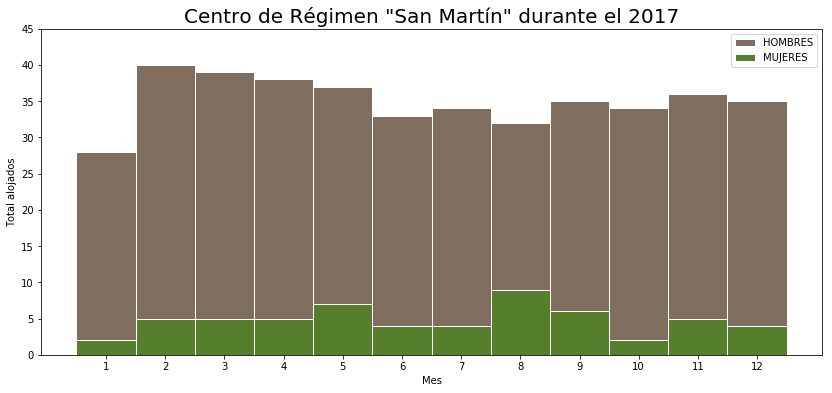

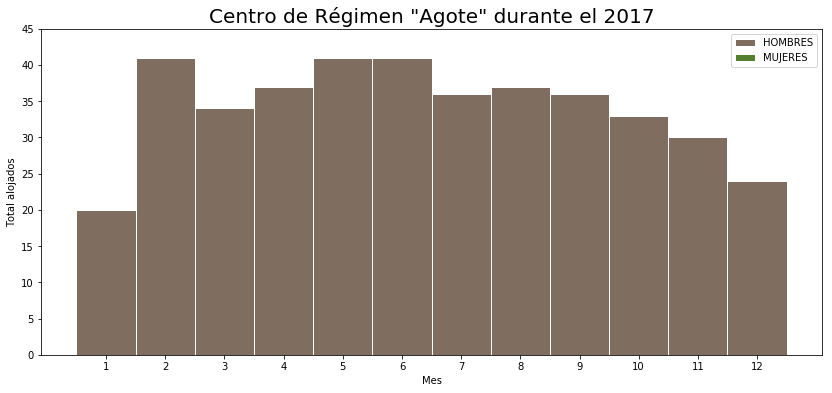

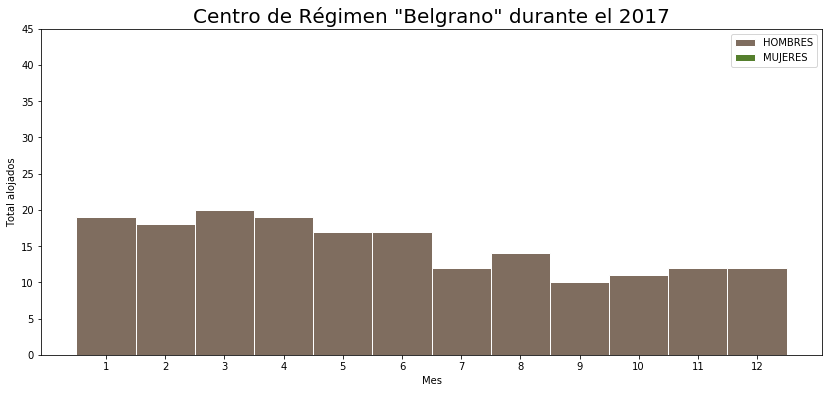

In [3]:
centros = dataset['CENTRO DE RÉGIMEN CERRADO '].unique()
centros = dataset[dataset['CENTRO DE RÉGIMEN CERRADO '] != 'Total']['CENTRO DE RÉGIMEN CERRADO '].unique()

for centro in centros:
    new_ds = dataset[dataset['CENTRO DE RÉGIMEN CERRADO ' ] == centro]
    new_ds = new_ds[new_ds['AÑO'] == 2017]

    hombres = np.array(new_ds['VARONES ALOJADOS'])
    mujeres = np.array(new_ds['MUJERES ALOJADAS'])

    plt.figure(figsize=(14,6))
    
    plt.bar(
        new_ds['MES'], 
        hombres, 
        bottom=mujeres,
        color='#7f6d5f', edgecolor='white', width=1, label='HOMBRES')
    plt.bar(
        new_ds['MES'], 
        mujeres, 
        edgecolor='white', color='#557f2d', width=1, label='MUJERES')
    
    plt.xticks(new_ds['MES'])
    plt.xlabel('Mes')
    plt.yticks(range(0, 50, 5))
    plt.ylabel('Total alojados')
    title = 'Centro de Régimen "' + centro + '" durante el 2017'
    plt.title(title, size=20)
    plt.legend()

In [4]:
ds2 = pd.read_csv('../datasets/base-de-datos-de-poblacion-y-alojamiento-en-el-spf-2009-2018.csv', sep=';', encoding='latin-1')
ds2 = ds2.iloc[:,:5]

unidades = ds2['UNIDAD'].unique()
unidades

array(['CPF I "Ezeiza"', 'Módulo 4 Jóvenes Adultos ( en CPF I)',
       'CPF II "Marcos Paz"', 'CPF CABA "Devoto" (ex Unidad 2)',
       'Unidad 3 "Instituto Correccional de Mujeres"',
       'Unidad 4 "Colonia Penal de Santa Rosa"',
       'Unidad 5 "Colonia Penal General Roca Subprefecto Miguel Rocha"',
       'Unidad 6 "Instituto de Seguridad y Resocialización"',
       'Unidad 7 "Prisión Regional del Norte"',
       'Unidad 8 "Instituto Penitenciario Federal de Jujuy. Nuestra Señora del Rosario de Río Blanco y Papaya"',
       'Unidad 9 "Prisión Regional del Sur"',
       'Unidad 10 "Cárcel de Formosa"',
       'Unidad 11 "Colonia Penal de Roque Sáenz Peña"',
       'Unidad 12 "Colonia Penal de Viedma"',
       'Unidad 13 "Instituto Correccional de Mujeres Santa Rosa',
       'Unidad 14 "Cárcel de Esquel. Subalcaide Abel Ricardo Muñoz"',
       'Unidad 15 "Cárcel de Río Gallegos"',
       'Unidad 16 "Instituto Penitenciario Federal de salta. Sra. Y Vírgen del Milagro"',
       'Uni

In [29]:
total = dataset[(dataset['AÑO'] == 2017) & (dataset['MES'] == 12) & (dataset['CENTRO DE RÉGIMEN CERRADO ']  == 'Total')]['TOTAL ALOJADOS']

In [30]:
print(total)

51    71
Name: TOTAL ALOJADOS, dtype: int64


In [33]:
round(71*100/1819, 1)

3.9